In [332]:
#3.
    #a. Create a new blank notebook. Save it inside the notebooks folder inside your repository.
    #b. In cell 1, Import the required packages with their customary aliases as follows:
       # import pandas as pd
        #import numpy as np
        #import matplotlib.pyplot as plt
        #import seaborn as sns


In [333]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [334]:
#4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [335]:
gdp_df = pd.read_csv('gdp_percapita.csv')

In [336]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [337]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [338]:
#5. How many rows and columns are in `gdp_df`? What are the data types of each column?
#The DataFrame has 8219 rows and 4 columns.
#dtype: object

In [339]:
print(f"Shape of gdp_df: {gdp_df.shape}")
print(f"Number of rows: {gdp_df.shape[0]}")
print(f"Number of columns: {gdp_df.shape[1]}")

Shape of gdp_df: (8219, 4)
Number of rows: 8219
Number of columns: 4


In [340]:
print(gdp_df.dtypes)


Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


In [341]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [342]:
#6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.


In [343]:
import pandas as pd

gdp_df = pd.read_csv('gdp_percapita.csv')
gdp_df.head()


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [344]:
import pandas as pd

gdp_df = pd.read_csv('gdp_percapita.csv')  # ← replace with your actual filename
print(list(gdp_df.columns))



['Country or Area', 'Year', 'Value', 'Value Footnotes']


In [345]:
# Clean up column names
gdp_df.columns = gdp_df.columns.str.strip()

# Drop the "Value Footnotes" column
gdp_df = gdp_df.drop(columns=['Value Footnotes'])

# Rename the remaining columns
gdp_df = gdp_df.rename(columns={
    'Country or Area': 'Country',
    'Value': 'GDP_Per_Capita'
})


In [346]:
print(gdp_df.head())
print(list(gdp_df.columns))


       Country  Year  GDP_Per_Capita
0  Afghanistan  2023     1992.424394
1  Afghanistan  2022     1981.710168
2  Afghanistan  2021     2144.166570
3  Afghanistan  2020     2769.685745
4  Afghanistan  2019     2927.245144
['Country', 'Year', 'GDP_Per_Capita']


In [347]:
 #7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [348]:
country_years = gdp_df.groupby('Country')['Year'].nunique()


In [349]:
countries_all_years = country_years[country_years == 34]
print(f"countries_all_years: {len(countries_all_years)}")
print(countries_all_years)


countries_all_years: 228
Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
Andorra                        34
                               ..
Vanuatu                        34
Viet Nam                       34
World                          34
Zambia                         34
Zimbabwe                       34
Name: Year, Length: 228, dtype: int64


In [350]:

countries_missing_years = country_years[country_years < 34]
print(f"countries_all_years: {len(countries_missing_years)}")
print("These countries are missing some years of data:\n")
print(countries_missing_years.sort_values())


countries_all_years: 19
These countries are missing some years of data:

Country
Djibouti                     11
Turks and Caicos Islands     13
Sint Maarten (Dutch part)    15
Faroe Islands                16
Kosovo                       16
Cayman Islands               18
Virgin Islands               21
Afghanistan                  24
CuraÃ§ao                     24
San Marino                   26
Montenegro                   27
Serbia                       29
West Bank and Gaza           30
Greenland                    32
Somalia                      33
Syrian Arab Republic         33
Tonga                        33
Bhutan                       33
Lebanon                      33
Name: Year, dtype: int64


In [351]:
#8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?




In [352]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]


In [353]:
sns.set(style="whitegrid")


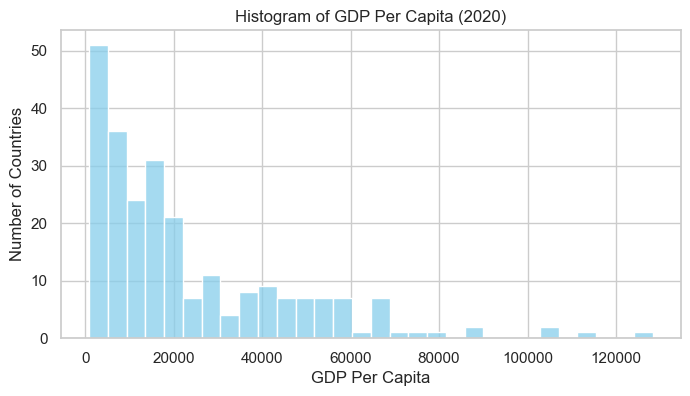

In [354]:
plt.figure(figsize=(8, 4))
sns.histplot(gdp_2020['GDP_Per_Capita'], bins=30, color='skyblue')
plt.title("Histogram of GDP Per Capita (2020)")
plt.xlabel("GDP Per Capita")
plt.ylabel("Number of Countries")
plt.show()


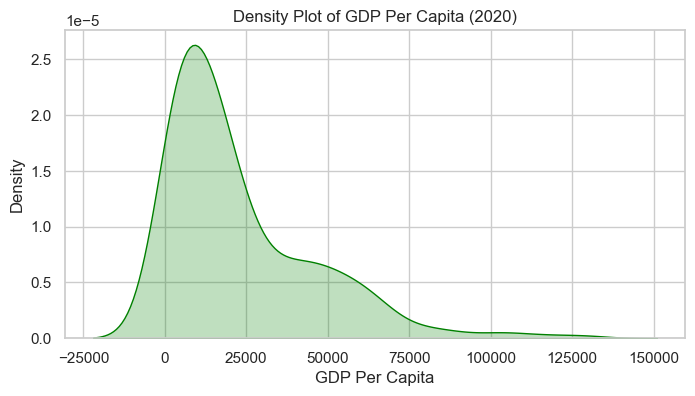

In [355]:
plt.figure(figsize=(8, 4))
sns.kdeplot(gdp_2020['GDP_Per_Capita'], fill=True, color='green')
plt.title("Density Plot of GDP Per Capita (2020)")
plt.xlabel("GDP Per Capita")
plt.show()


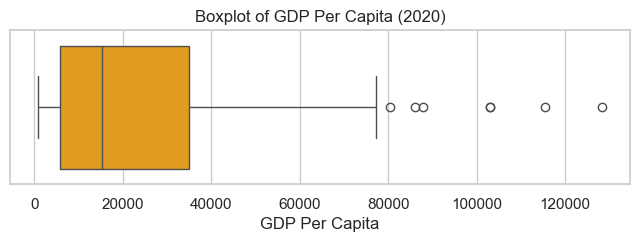

In [356]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=gdp_2020['GDP_Per_Capita'], color='orange')
plt.title("Boxplot of GDP Per Capita (2020)")
plt.xlabel("GDP Per Capita")
plt.show()


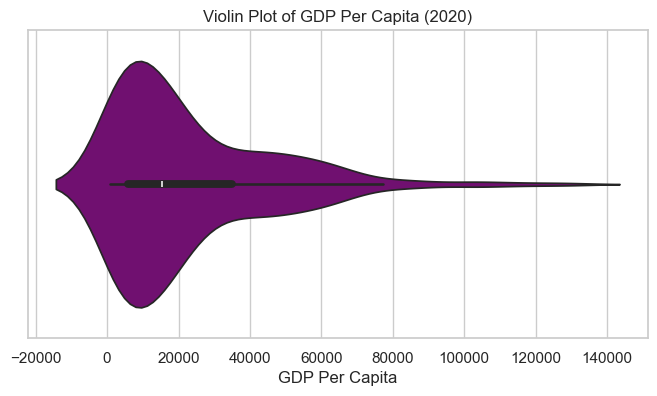

In [357]:
plt.figure(figsize=(8, 4))
sns.violinplot(x=gdp_2020['GDP_Per_Capita'], color='purple')
plt.title("Violin Plot of GDP Per Capita (2020)")
plt.xlabel("GDP Per Capita")
plt.show()


In [358]:
#9. What was the median GDP per capita value in 2020?

In [359]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]


In [360]:
median_gdp = gdp_2020['GDP_Per_Capita'].median()
print(f"The median GDP per capita in 2020 was: {median_gdp:.2f}")


The median GDP per capita in 2020 was: 15309.24


In [373]:
#10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
#* A boxplot
	#* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	#* A scatterplot
	#* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
#Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.



In [ ]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]


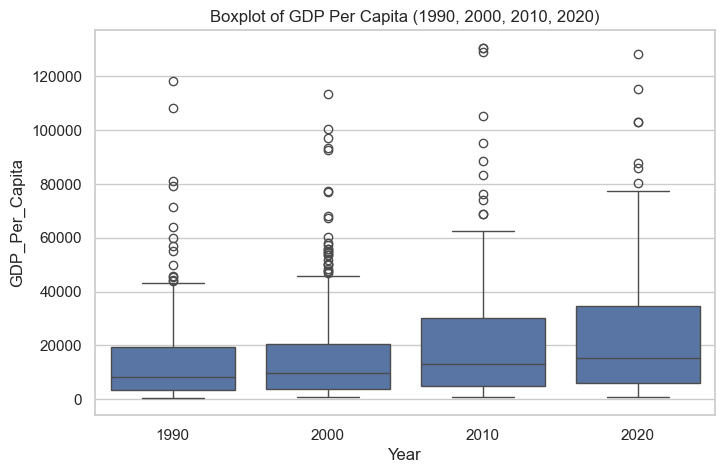

In [375]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)
plt.title('Boxplot of GDP Per Capita (1990, 2000, 2010, 2020)')
plt.show()


C:\Users\jingl\AppData\Local\Temp\ipykernel_13196\2189126717.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades, estimator='mean', ci='sd')


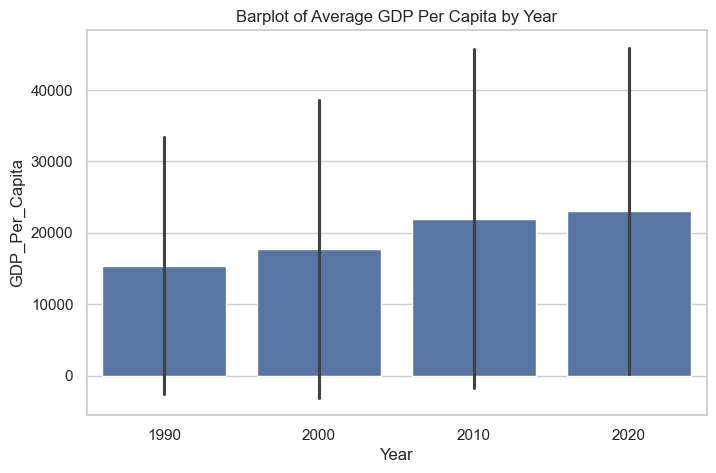

In [377]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades, estimator='mean', ci='sd')
plt.title('Barplot of Average GDP Per Capita by Year')
plt.show()


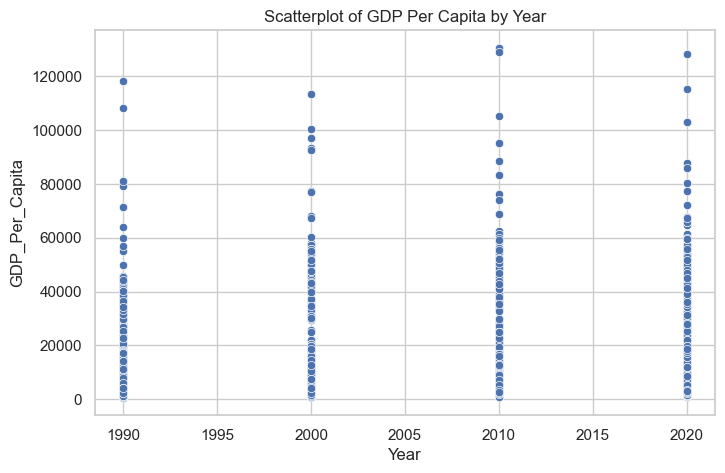

In [379]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)
plt.title('Scatterplot of GDP Per Capita by Year')
plt.show()


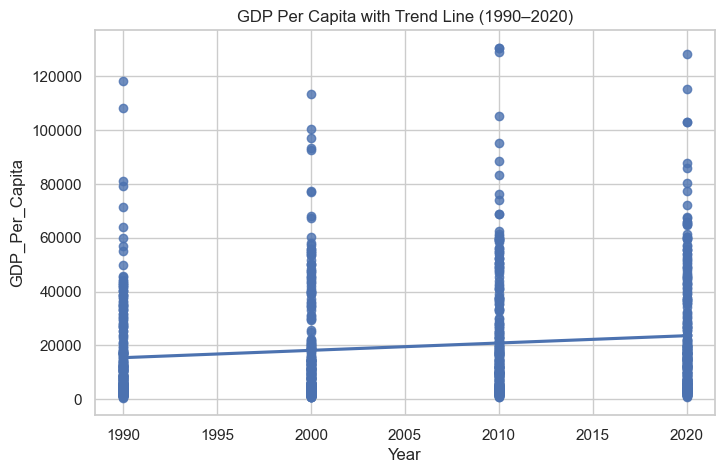

In [381]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Year', y='GDP_Per_Capita', data=gdp_decades, scatter=True, ci=None)
plt.title('GDP Per Capita with Trend Line (1990–2020)')
plt.show()


In [ ]:
11. Which country was the first to have a GDP per capita greater than $100,000?

In [ ]:
rich_countries = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]


In [ ]:
rich_countries_sorted = rich_countries.sort_values(by='Year')


In [ ]:
first_rich_country = rich_countries_sorted.iloc[0]
print("The first country to have a GDP per capita > $100,000:")
print(first_rich_country)


In [ ]:
12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [ ]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]


In [ ]:
top_country_row = gdp_2020[gdp_2020['GDP_Per_Capita'] == gdp_2020['GDP_Per_Capita'].max()]
top_country = top_country_row.iloc[0]['Country']

print(f" The country with the highest GDP per capita in 2020 was: {top_country}")


In [ ]:
top_country_data = gdp_df[gdp_df['Country'] == top_country]


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(top_country_data['Year'], top_country_data['GDP_Per_Capita'], marker='o')
plt.title(f"GDP Per Capita Over Time for {top_country}")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?


In [ ]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]


In [ ]:
lowest_row = gdp_2020[gdp_2020['GDP_Per_Capita'] == gdp_2020['GDP_Per_Capita'].min()]
lowest_country = lowest_row.iloc[0]['Country']

print(f"The country with the lowest GDP per capita in 2020 was: {lowest_country}")


In [ ]:
lowest_country_data = gdp_df[gdp_df['Country'] == lowest_country]

plt.figure(figsize=(10, 5))
plt.plot(lowest_country_data['Year'], lowest_country_data['GDP_Per_Capita'], marker='o', color='red')
plt.title(f"GDP Per Capita Over Time for {lowest_country}")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
Bonus Question:
Is it true that most countries had higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [ ]:
gdp_1990 = gdp_df[gdp_df['Year'] == 1990][['Country', 'GDP_Per_Capita']]
gdp_2020 = gdp_df[gdp_df['Year'] == 2020][['Country', 'GDP_Per_Capita']]


In [ ]:
gdp_compare = pd.merge(gdp_1990, gdp_2020, on='Country', suffixes=('_1990', '_2020'))


In [ ]:
gdp_declined = gdp_compare[gdp_compare['GDP_Per_Capita_2020'] < gdp_compare['GDP_Per_Capita_1990']]
print("📉 Countries with *lower* GDP per capita in 2020 than in 1990:\n")
print(gdp_declined[['Country', 'GDP_Per_Capita_1990', 'GDP_Per_Capita_2020']])


In [ ]:
total_countries = gdp_compare.shape[0]
declined_count = gdp_declined.shape[0]
improved_count = total_countries - declined_count

print(f"{improved_count} countries had higher GDP per capita in 2020 than in 1990.")
print(f"{declined_count} countries had lower GDP per capita in 2020 than in 1990.")


In [ ]:
14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.


In [ ]:
internet_df = pd.read_csv(
    'internet_use.csv',      
    encoding='utf-8',        
    sep=',',               
    on_bad_lines='skip',     
    engine='python'          
)


In [ ]:
print(internet_df.head()) 

In [ ]:
print(internet_df.tail()) 

In [ ]:
print(internet_df.columns) 

In [ ]:
print(internet_df.dtypes)

In [ ]:
15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.


In [ ]:
internet_df.columns = internet_df.columns.str.strip()

In [ ]:
internet_df = internet_df.drop(columns=['Value Footnotes'])

In [ ]:
internet_df = internet_df.rename(columns={
    'Country or Area': 'Country',
    'Value': 'Internet_Users_Pct'
})

In [ ]:
print(internet_df.head())

In [ ]:
print(internet_df.columns)

In [ ]:
16. Look at the number of observations in this dataset per year. What do you notice?

In [ ]:
year_counts = internet_df['Year'].value_counts().sort_index()
print(year_counts)


In [ ]:
print(internet_df.columns)


In [ ]:
print(internet_df.dtypes)

In [ ]:
internet_df['Year'] = pd.to_numeric(internet_df['Year'], errors='coerce')


In [ ]:
internet_df = internet_df.dropna(subset=['Year'])


In [ ]:
internet_df = internet_df[internet_df['Year'] >= 1980]


In [ ]:
year_counts = internet_df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar', color='skyblue')

plt.title("Number of Internet Usage Observations per Year")
plt.xlabel("Year")
plt.ylabel("Number of Countries")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
17. What is the first year to have a non-zero internet users percentage value?

In [ ]:
non_zero_internet = internet_df[internet_df['Internet_Users_Pct'] > 0]


In [ ]:
first_year = non_zero_internet['Year'].min()
print(f"The first year with non-zero internet users percentage is: {int(first_year)}")


In [ ]:
18. How does the distribution of internet users percent differ for 2000 and 2014?


In [ ]:
internet_2000 = internet_df[internet_df['Year'] == 2000]
internet_2014 = internet_df[internet_df['Year'] == 2014]


In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(internet_2000['Internet_Users_Pct'], fill=True, label='2000', color='red')
sns.kdeplot(internet_2014['Internet_Users_Pct'], fill=True, label='2014', color='green')

plt.title("Distribution of Internet Users (%) - 2000 vs 2014")
plt.xlabel("Internet Users Percentage")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
19. For how many countries was the percentage of internet users below 5% in 2014?


In [ ]:
20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.



In [ ]:
internet_2014 = internet_df[internet_df['Year'] == 2014]


In [ ]:
low_internet_2014 = internet_2014[internet_2014['Internet_Users_Pct'] < 5]


In [ ]:
count_low = low_internet_2014['Country'].nunique()
print(f"In 2014, {count_low} countries had less than 5% internet users.")


In [ ]:
21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?


In [ ]:
internet_2014 = internet_df[internet_df['Year'] == 2014]

In [ ]:
top3_internet_countries = internet_2014.sort_values(by='Internet_Users_Pct', ascending=False).head(3)


In [ ]:
top3_countries = top3_internet_countries['Country'].tolist()

In [ ]:
print("Top 3 countries in 2014 by internet usage:")
print(top3_countries)

In [ ]:
top3_gdp = gdp_df[gdp_df['Country'].isin(top3_countries)]


In [ ]:

plt.figure(figsize=(10, 6))

for country in top3_countries:
    country_data = top3_gdp[top3_gdp['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP_Per_Capita'], marker='o', label=country)

plt.title("GDP Per Capita Over Time for Top 3 Internet Usage Countries (2014)")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.


In [ ]:
gdp_and_internet_use = pd.merge(
    gdp_df,
    internet_df,
    on=['Country', 'Year'],
    how='inner' 
)


In [ ]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]


In [ ]:
print(gdp_and_internet_use_2014.head())

In [ ]:
print(gdp_and_internet_use_2014.columns)

In [ ]:
23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=gdp_and_internet_use_2014,
    x='GDP_Per_Capita',
    y='Internet_Users_Pct'
)

plt.title("Internet Users % vs. GDP per Capita (2014)")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Internet Users Percentage (%)")
plt.grrid(Tue)
plt.tight_layout()
plt.show()

In [ ]:
24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".


In [ ]:
gdp_per_capita_2014 = gdp_df[gdp_df['Year'] == 2014]


In [ ]:

gdp_per_capita_2014 = gdp_per_capita_2014.copy()

gdp_per_capita_2014['GDP_group'] = pd.qcut(
    gdp_per_capita_2014['GDP_Per_Capita'],
    q=3,
    labels=["Low", "Medium", "High"]
)




In [ ]:
print(gdp_per_capita_2014[['Country', 'GDP_Per_Capita', 'GDP_group']].head())


In [ ]:
25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?


In [ ]:
gdp_and_internet_use_2014


In [ ]:
gdp_and_internet_use_2014 = gdp_and_internet_use_2014.copy()

gdp_and_internet_use_2014['GDP_group'] = pd.qcut(
    gdp_and_internet_use_2014['GDP_Per_Capita'],
    q=3,
    labels=["Low", "Medium", "High"]
)




In [369]:
median_internet_by_group = gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()

print("Median Internet Users % by GDP Group:\n")
print(median_internet_by_group)


Median Internet Users % by GDP Group:

GDP_group
Low       11.4000
Medium    45.5904
High      76.1603
Name: Internet_Users_Pct, dtype: float64


C:\Users\jingl\AppData\Local\Temp\ipykernel_13196\2749792880.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_internet_by_group = gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()


In [ ]:
### Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.


    

In [ ]:
#Download "Employment-to-population ratio"